In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Old

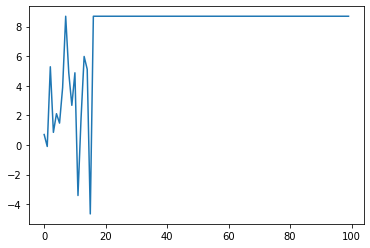

In [131]:
# Arms = [np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7),
#         np.random.normal(loc=4, scale=1.5), 
#         np.random.normal(loc=3, scale=3),
#         np.random.normal(loc=5, scale=0.9),
#         np.random.normal(loc=2.5, scale=7)]

# n = 100
# k = 4*4
# delta = 0.1
# X = np.zeros(n)
# T = np.zeros(k)
# arms_mat = np.zeros((n,k))
# mu = np.zeros(k)

# A = np.zeros(n, dtype = int)
# for t in range(n):
#     all_A_t = np.zeros(k)
#     for i in range(k):
#         all_A_t[i] = UCB(i, delta)
#     A[t] = np.argmax(all_A_t)
# #     print(T[A[t]])
#     X[t] = Arms[int(A[t])]
#     T[A[t]] += 1
#     arms_mat[t, A[t]] = X[t]
#     mu[A[t]] = 1/T[A[t]] * sum(arms_mat[:, A[t]])
    
# plt.plot(X)

## Actual

* Formule du regret

$$
R_n = n \mu^{*} -  \mathbf{E}\left[\sum_t X_t \right] = n \mu^{*} - \sum \mu_t = n \mu^{*} - < T| \mu >
$$

Avec $\mu_t$ la moyenne de la distribution d'où est tirée $X_t$

In [3]:
def UCB(i, delta, mu, T):
    if T[i] == 0:
        return 1000000000000
    else:
        return mu[i] + np.sqrt(2 * np.log(1/delta)/T[i])

In [102]:
def UCB_tot(n, delta, k, means, std):
    X = np.zeros(n) ##Réalisations (X_t)_t
    T = np.zeros(k) ##T[i] = nb de fois où i a été tiré
    arms_mat = np.zeros((n,k))
    mu = np.zeros(k) ##mu[i] = moyenne empirique de i

    A = np.zeros(n, dtype = int)
    
    ##Compute Rn at each iteration
    Rn = np.zeros(n)
    mu_star = np.max(means)
    for t in range(n):
        all_A_t = np.zeros(k)
        for i in range(k):
            all_A_t[i] = UCB(i, delta, mu, T) ##On calcul UCB_i pour tous les bras
        A[t] = np.argmax(all_A_t) ##On prend le bras qui a le UCB_i le plus haut
        X[t] = launch_arm(A[t]) ##On génère X_t la réalisation à partir du bras choisi
        T[A[t]] += 1 ##Le bras i a été tiré une fois de plus
        arms_mat[t, A[t]] = X[t] ##On stock la valeur de la réalisation dans une matrice
        mu[A[t]] = 1/T[A[t]] * sum(arms_mat[:, A[t]]) ##On update la moyenne empirique
        Rn[t] = (t+1)*mu_star - T@mu ##On calcul le regret à l'instant t
    return X, Rn, A, mu


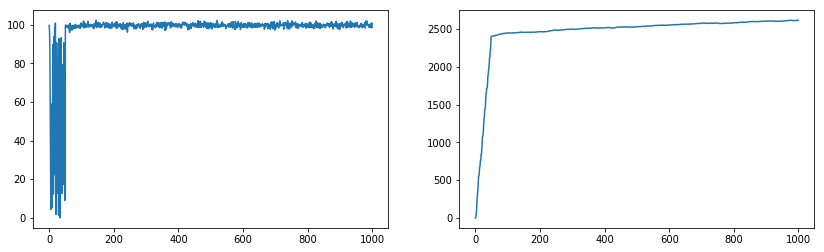

In [131]:
n = 1000
delta = 1/(n**2)

#Total number of arms
k = 50

means = [100*np.random.rand() for i in range(k)]
std = [5*np.random.rand() for i in range(k)]

#Return reward of arm i
def launch_arm(i):
    ## La distribution doit être 1 sub-ussian
    return np.random.normal(means[i],std[i])

#on calcule la moyenne des résultats sur max_ite tentatives
max_ite = 10
X_t_mean = np.zeros((max_ite,n))
Rn_mean = np.zeros((max_ite,n))
for ite in range(max_ite):
    X_t, Rn, arms, mu= UCB_tot(n, delta, k, means, std)
    X_t_mean[ite] = X_t
    Rn_mean[ite] = Rn

plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.plot(np.sum(X_t_mean,axis=0)/max_ite)
plt.subplot(1,2,2)
plt.plot(np.sum(Rn_mean,axis=0)/max_ite)


**Bras choisis**

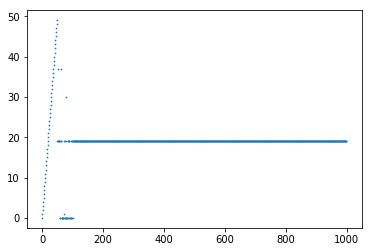

In [132]:
plt.scatter(range(n),arms,s=0.5)